In [108]:
#hide
#from fastbook import *
from fastai.vision.widgets import *

In [2]:
import pandas as pd

In [4]:
dog_breeds = '''Breed 	rank
Retrievers (Labrador)  	1
French Bulldogs	2
Retrievers (Golden) 	3
German Shepherd Dogs	4
Poodles	5
Bulldogs	6
Beagles	7
Rottweilers	8
Pointers (German Shorthaired)	9
Dachshunds	10
Pembroke Welsh Corgis	11
Australian Shepherds	12
Yorkshire Terriers	13
Boxers	14
Cavalier King Charles Spaniels	15
Doberman Pinschers	16
Great Danes	17
Miniature Schnauzers	18
Siberian Huskies	19
Bernese Mountain Dogs	20
Cane Corso	21
Shih Tzu	22
Boston Terriers	23
Pomeranians	24
Havanese	25
Spaniels (English Springer)	26
Brittanys	27
Shetland Sheepdogs	28
Spaniels (Cocker)	29
Miniature American Shepherds	30
Border Collies	31
Vizslas	32
Pugs	33
Basset Hounds	34
Mastiffs	35
Belgian Malinois	36
Chihuahuas	37
Collies	38
Maltese	39
Weimaraners	40
Rhodesian Ridgebacks	41
Shiba Inu	42
Spaniels (English Cocker)	43
Portuguese Water Dogs	44
Newfoundlands	45
West Highland White Terriers	46
Bichons Frises	47
Retrievers (Chesapeake Bay)	48
Dalmatians	49
Bloodhounds	50
Australian Cattle Dogs	51
Akitas	52
St. Bernards	53
Papillons	54
Samoyeds	55
Bullmastiffs	56
Whippets	57
Scottish Terriers	58
Pointers (German Wirehaired)	59
Wirehaired Pointing Griffons	60
Bull Terriers	61
Airedale Terriers	62
Great Pyrenees	63
Chinese Shar-Pei	64
Giant Schnauzers	65
Soft Coated Wheaten Terriers	66
Cardigan Welsh Corgis	67
Alaskan Malamutes	68
Old English Sheepdogs	69
Dogues de Bordeaux	70
Setters (Irish)	71
Russell Terriers	72
Italian Greyhounds	73
Cairn Terriers	74
Staffordshire Bull Terriers	75
Miniature Pinschers	76
Chinese Crested	77
Greater Swiss Mountain Dogs	78
Lagotti Romagnoli	79
Chow Chows	80
American Staffordshire Terriers	81
Biewer Terriers	82
Coton de Tulear	83
Lhasa Apsos	84
Irish Wolfhounds	85
Rat Terriers	86
Basenjis	87
Anatolian Shepherd Dogs	88
Dogo Argentinos	89
Spaniels (Boykin)	90
Border Terriers	91
Retrievers (Nova Scotia Duck Tolling)	92
Retrievers (Flat-Coated)	93
Pekingese	94
Keeshonden	95
Standard Schnauzers	96
Brussels Griffons	97
Setters (English)	98
Fox Terriers (Wire)	99
Norwegian Elkhounds	100'''
import io
breeds = pd.read_csv(io.StringIO(dog_breeds), sep='\t')
breeds

,Breed,rank
0,Retrievers (Labrador),1
1,French Bulldogs,2
2,Retrievers (Golden),3
3,German Shepherd Dogs,4
4,Poodles,5
...,...,...
95,Standard Schnauzers,96
96,Brussels Griffons,97
97,Setters (English),98
98,Fox Terriers (Wire),99


In [5]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

!pip install fastai duckduckgo_search

  Using cached torch-1.12.1-cp39-cp39-manylinux1_x86_64.whl (776.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 15.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:


      Successfully uninstalled numpy-1.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [7]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('goat photos', max_images=1)
urls[0]

Searching for 'goat photos'


'https://images.pexels.com/photos/1011630/pexels-photo-1011630.jpeg?cs=srgb&dl=animal-white-young-1011630.jpg&fm=jpg'

/home/jong/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


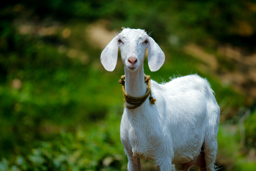

In [8]:
from fastdownload import download_url
dest = 'goat.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'sheep photos'


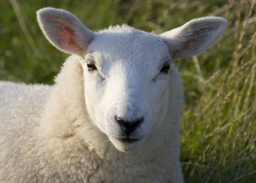

In [9]:
download_url(search_images('sheep photos', max_images=1)[0], 'sheep.jpg', show_progress=False)
Image.open('sheep.jpg').to_thumb(256,256)

In [22]:
next(breeds.itertuples())

Pandas(Index=0, _1='Retrievers (Labrador)  ', rank=1)

In [73]:
path = Path('dog_breeds')
from time import sleep

for i, row in enumerate(breeds.itertuples()):
    print(f'{i} / 100')
    o = row._1
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} photo'))
    download_images(dest, urls=search_images(f'{o} puppy photo'))
    sleep(5)  # Pause between searches to avoid over-loading server
#     download_images(dest, urls=search_images(f'{o} cute photo'))
#     sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Retrievers (Labrador)   puppy photo'
Searching for 'French Bulldogs puppy photo'
Searching for 'Retrievers (Golden)  puppy photo'
Searching for 'German Shepherd Dogs puppy photo'
Searching for 'Poodles puppy photo'
Searching for 'Bulldogs puppy photo'
Searching for 'Beagles puppy photo'
Searching for 'Rottweilers puppy photo'
Searching for 'Pointers (German Shorthaired) puppy photo'
Searching for 'Dachshunds puppy photo'
Searching for 'Pembroke Welsh Corgis puppy photo'
Searching for 'Australian Shepherds puppy photo'
Searching for 'Yorkshire Terriers puppy photo'
Searching for 'Boxers puppy photo'
Searching for 'Cavalier King Charles Spaniels puppy photo'
Searching for 'Doberman Pinschers puppy photo'
Searching for 'Great Danes puppy photo'
Searching for 'Miniature Schnauzers puppy photo'
Searching for 'Siberian Huskies puppy photo'
Searching for 'Bernese Mountain Dogs puppy photo'
Searching for 'Cane Corso puppy photo'
Searching for 'Shih Tzu puppy photo'
Searching for

In [74]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

11

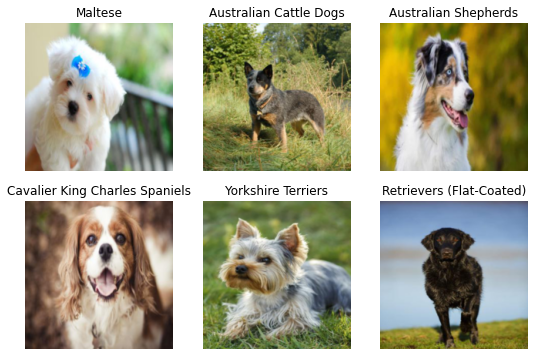

In [119]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [112]:
dls

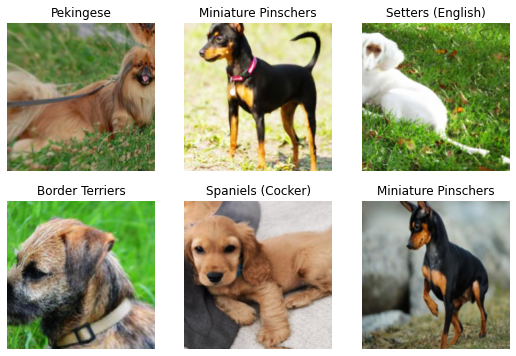

In [125]:
rand_dls = dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2),
).dataloaders(path, bs=32)

rand_dls.show_batch(max_n=6)

In [127]:
learn = vision_learner(rand_dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/jong/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/jong/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.377644,0.866022,0.272937,06:49


epoch,train_loss,valid_loss,error_rate,time
0,1.323720,0.642964,0.206578,11:09
1,1.005120,0.544182,0.173110,11:25
2,0.752555,0.457671,0.159261,10:50


In [137]:
# Need to train a little more
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.881409,0.540888,0.184074,08:13


epoch,train_loss,valid_loss,error_rate,time
0,0.861799,0.594039,0.186959,12:13
1,0.766676,0.497125,0.160993,10:52
2,0.556237,0.452975,0.152337,10:49


https://images.dog.ceo/breeds/shiba/shiba-8.jpg


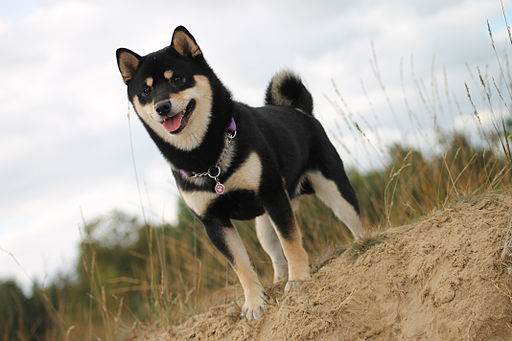

In [55]:
import requests, io

def get_dog_img(should_print=False):
    img = requests.get("https://dog.ceo/api/breeds/image/random").json()['message']
    if should_print:
        print(img)
    img = requests.get(img).content
    return PILImage.create(io.BytesIO(img))
get_dog_img(True)

In [146]:
is_bird,_,probs = learn.predict(get_dog_img(True))
print(f"This is a: {is_bird} with prob {probs[0]:.10f}")

https://images.dog.ceo/breeds/poodle-medium/PXL_20210220_100624962.jpg


This is a: Portuguese Water Dogs with prob 0.0000396995


In [148]:
breed_, _, _prob = learn.predict(PILImage.create('laur.jpg'))
breed_, _prob[0]

('Irish Wolfhounds', TensorBase(4.8011e-06))

In [87]:
import time
for _ in range(100):
    time.sleep(1)
    is_bird,_,probs = learn.predict(get_dog_img(True))
    print(f"This is a: {is_bird} with prob {probs[0]:.10f}")

https://images.dog.ceo/breeds/elkhound-norwegian/n02091467_1544.jpg


This is a: Norwegian Elkhounds with prob 0.0000000000
https://images.dog.ceo/breeds/african/n02116738_9232.jpg


This is a: Chinese Crested with prob 0.0007676983
https://images.dog.ceo/breeds/spaniel-welsh/n02102177_66.jpg


This is a: Setters (English) with prob 0.0005251733
https://images.dog.ceo/breeds/mountain-bernese/n02107683_1958.jpg


This is a: Bernese Mountain Dogs with prob 0.0000016920
https://images.dog.ceo/breeds/deerhound-scottish/n02092002_3867.jpg


This is a: Irish Wolfhounds with prob 0.0000002111
https://images.dog.ceo/breeds/corgi-cardigan/n02113186_9000.jpg


This is a: Cardigan Welsh Corgis with prob 0.0000154680
https://images.dog.ceo/breeds/dhole/n02115913_1682.jpg


This is a: Retrievers (Chesapeake Bay) with prob 0.0037766779
https://images.dog.ceo/breeds/groenendael/n02105056_4601.jpg


This is a: Retrievers (Flat-Coated) with prob 0.0002892298
https://images.dog.ceo/breeds/terrier-welsh/lucy.jpg


This is a: Airedale Terriers with prob 0.6100857854
https://images.dog.ceo/breeds/springer-english/n02102040_5388.jpg


This is a: Portuguese Water Dogs with prob 0.0000039225
https://images.dog.ceo/breeds/greyhound-italian/n02091032_6587.jpg


This is a: Dalmatians with prob 0.0000283213
https://images.dog.ceo/breeds/brabancon/n02112706_1805.jpg


This is a: Brussels Griffons with prob 0.0000424125
https://images.dog.ceo/breeds/terrier-wheaten/n02098105_2842.jpg


This is a: Lagotti Romagnoli with prob 0.0106078293
https://images.dog.ceo/breeds/terrier-bedlington/n02093647_2822.jpg


This is a: Lagotti Romagnoli with prob 0.0009665060
https://images.dog.ceo/breeds/keeshond/n02112350_7952.jpg


This is a: Keeshonden with prob 0.0000020721
https://images.dog.ceo/breeds/spaniel-sussex/n02102480_276.jpg


This is a: Spaniels (English Cocker) with prob 0.0001144339
https://images.dog.ceo/breeds/cockapoo/Scout.jpg


This is a: Lagotti Romagnoli with prob 0.0004131994
https://images.dog.ceo/breeds/terrier-kerryblue/n02093859_3283.jpg


This is a: Giant Schnauzers with prob 0.0005083788
https://images.dog.ceo/breeds/hound-blood/n02088466_6775.jpg


This is a: Bloodhounds with prob 0.0004472825
https://images.dog.ceo/breeds/briard/n02105251_7056.jpg


This is a: Cairn Terriers with prob 0.0349657573
https://images.dog.ceo/breeds/spaniel-irish/n02102973_2224.jpg


This is a: Lagotti Romagnoli with prob 0.0000703265
https://images.dog.ceo/breeds/puggle/IMG_104450.jpg


This is a: Mastiffs with prob 0.0000902064
https://images.dog.ceo/breeds/african/n02116738_7170.jpg


This is a: Chinese Crested with prob 0.0002572612
https://images.dog.ceo/breeds/mix/dog3.jpg


This is a: Rottweilers with prob 0.0043151909
https://images.dog.ceo/breeds/shiba/shiba-5.jpg


This is a: Shiba Inu with prob 0.0000004681
https://images.dog.ceo/breeds/terrier-wheaten/n02098105_1092.jpg


This is a: Spaniels (English Cocker) with prob 0.0014714473
https://images.dog.ceo/breeds/ovcharka-caucasian/IMG_20190528_194200.jpg


This is a: Irish Wolfhounds with prob 0.0101416223
https://images.dog.ceo/breeds/setter-gordon/n02101006_3766.jpg


This is a: Rottweilers with prob 0.0125402771
https://images.dog.ceo/breeds/bluetick/n02088632_291.jpg


This is a: Pointers (German Wirehaired) with prob 0.0000529373
https://images.dog.ceo/breeds/spaniel-sussex/n02102480_1676.jpg


This is a: Spaniels (Boykin) with prob 0.0000569434
https://images.dog.ceo/breeds/keeshond/n02112350_8124.jpg


This is a: Keeshonden with prob 0.0001290608
https://images.dog.ceo/breeds/terrier-kerryblue/n02093859_132.jpg


This is a: Portuguese Water Dogs with prob 0.0013224630
https://images.dog.ceo/breeds/hound-plott/hhh_plott002.JPG


This is a: Siberian Huskies with prob 0.0003495515
https://images.dog.ceo/breeds/terrier-australian/n02096294_1955.jpg


This is a: Yorkshire Terriers with prob 0.2408808023
https://images.dog.ceo/breeds/airedale/n02096051_6895.jpg


This is a: Airedale Terriers with prob 0.9918236136
https://images.dog.ceo/breeds/mountain-bernese/n02107683_4200.jpg


This is a: Bernese Mountain Dogs with prob 0.0000001111
https://images.dog.ceo/breeds/chow/n02112137_6458.jpg


This is a: Chow Chows with prob 0.0000005083
https://images.dog.ceo/breeds/airedale/n02096051_7602.jpg


This is a: Airedale Terriers with prob 0.8948373795
https://images.dog.ceo/breeds/terrier-yorkshire/terry.jpg


This is a: German Shepherd Dogs with prob 0.0734260827
https://images.dog.ceo/breeds/african/n02116738_8945.jpg


This is a: Belgian Malinois with prob 0.0000804698
https://images.dog.ceo/breeds/saluki/n02091831_4667.jpg


This is a: Beagles with prob 0.0022920596
https://images.dog.ceo/breeds/sharpei/noel.jpg


This is a: Pointers (German Shorthaired) with prob 0.0000073191
https://images.dog.ceo/breeds/newfoundland/n02111277_2807.jpg


This is a: Newfoundlands with prob 0.0000000017
https://images.dog.ceo/breeds/hound-afghan/n02088094_4114.jpg


This is a: Soft Coated Wheaten Terriers with prob 0.0026623034
https://images.dog.ceo/breeds/retriever-chesapeake/n02099849_3940.jpg


This is a: Pointers (German Wirehaired) with prob 0.0001190772
https://images.dog.ceo/breeds/schipperke/n02104365_6798.jpg


This is a: Belgian Malinois with prob 0.0000038962
https://images.dog.ceo/breeds/poodle-standard/n02113799_5157.jpg


This is a: Lagotti Romagnoli with prob 0.0007135400
https://images.dog.ceo/breeds/terrier-lakeland/n02095570_4625.jpg


This is a: Bull Terriers with prob 0.0325167179
https://images.dog.ceo/breeds/hound-plott/hhh-23456.jpeg


This is a: Great Danes with prob 0.0001997450
https://images.dog.ceo/breeds/whippet/n02091134_14932.jpg


This is a: St. Bernards with prob 0.0000680647
https://images.dog.ceo/breeds/brabancon/n02112706_449.jpg


This is a: Cane Corso with prob 0.0000036033
https://images.dog.ceo/breeds/eskimo/n02109961_17033.jpg


This is a: Alaskan Malamutes with prob 0.0000011166
https://images.dog.ceo/breeds/spaniel-japanese/n02085782_4294.jpg


This is a: Papillons with prob 0.0000052887
https://images.dog.ceo/breeds/collie-border/n02106166_4450.jpg


This is a: Border Collies with prob 0.0000344777
https://images.dog.ceo/breeds/weimaraner/n02092339_235.jpg


This is a: Weimaraners with prob 0.0000035405
https://images.dog.ceo/breeds/spaniel-japanese/n02085782_3121.jpg


This is a: Papillons with prob 0.0000018837
https://images.dog.ceo/breeds/saluki/n02091831_4846.jpg


This is a: Anatolian Shepherd Dogs with prob 0.0006309872
https://images.dog.ceo/breeds/terrier-welsh/lucy.jpg


This is a: Airedale Terriers with prob 0.6100857854
https://images.dog.ceo/breeds/pug/n02110958_15422.jpg


This is a: Pugs with prob 0.0000093638
https://images.dog.ceo/breeds/terrier-tibetan/n02097474_6035.jpg


This is a: Portuguese Water Dogs with prob 0.0001317385
https://images.dog.ceo/breeds/cockapoo/bubbles2.jpg


This is a: Coton de Tulear with prob 0.0031461043
https://images.dog.ceo/breeds/spaniel-brittany/n02101388_190.jpg


This is a: Cavalier King Charles Spaniels with prob 0.0000618946
https://images.dog.ceo/breeds/schipperke/n02104365_2031.jpg


This is a: Scottish Terriers with prob 0.0000329646
https://images.dog.ceo/breeds/spaniel-sussex/n02102480_4910.jpg


This is a: Spaniels (Boykin) with prob 0.0002300417
https://images.dog.ceo/breeds/terrier-scottish/n02097298_65.jpg


This is a: Scottish Terriers with prob 0.0000083035
https://images.dog.ceo/breeds/lhasa/n02098413_631.jpg


This is a: Pekingese with prob 0.0000125294
https://images.dog.ceo/breeds/segugio-italian/n02090722_002.jpg


This is a: Basset Hounds with prob 0.0000175716
https://images.dog.ceo/breeds/pinscher-miniature/n02107312_1586.jpg


This is a: Miniature Pinschers with prob 0.0005385681
https://images.dog.ceo/breeds/lhasa/n02098413_342.jpg


This is a: Havanese with prob 0.0000175940
https://images.dog.ceo/breeds/brabancon/n02112706_204.jpg


This is a: Chihuahuas with prob 0.0009895865
https://images.dog.ceo/breeds/terrier-australian/n02096294_2118.jpg


This is a: Yorkshire Terriers with prob 0.1025822461
https://images.dog.ceo/breeds/setter-english/n02100735_10201.jpg


This is a: Setters (English) with prob 0.0006305703
https://images.dog.ceo/breeds/terrier-tibetan/n02097474_4929.jpg


This is a: Lhasa Apsos with prob 0.0000001948
https://images.dog.ceo/breeds/terrier-dandie/n02096437_643.jpg


This is a: Old English Sheepdogs with prob 0.0029298838
https://images.dog.ceo/breeds/hound-blood/n02088466_9533.jpg


This is a: Bloodhounds with prob 0.0000004610
https://images.dog.ceo/breeds/spaniel-cocker/n02102318_2997.jpg


This is a: Spaniels (Cocker) with prob 0.0000013725
https://images.dog.ceo/breeds/waterdog-spanish/20180706_194432.jpg


This is a: Lagotti Romagnoli with prob 0.0002663592
https://images.dog.ceo/breeds/pyrenees/n02111500_4320.jpg


This is a: Soft Coated Wheaten Terriers with prob 0.0027203273
https://images.dog.ceo/breeds/hound-basset/n02088238_490.jpg


This is a: Basset Hounds with prob 0.0002048753
https://images.dog.ceo/breeds/collie-border/n02106166_1776.jpg


This is a: Border Collies with prob 0.0000283877
https://images.dog.ceo/breeds/poodle-standard/n02113799_7092.jpg


This is a: Bull Terriers with prob 0.0001468265
https://images.dog.ceo/breeds/terrier-yorkshire/n02094433_2740.jpg


This is a: Miniature Schnauzers with prob 0.0002682541
https://images.dog.ceo/breeds/dingo/n02115641_7549.jpg


This is a: Italian Greyhounds with prob 0.0290139392
https://images.dog.ceo/breeds/newfoundland/n02111277_3504.jpg


This is a: Newfoundlands with prob 0.0000568089
https://images.dog.ceo/breeds/hound-english/n02089973_2457.jpg


This is a: Great Danes with prob 0.0007119485
https://images.dog.ceo/breeds/retriever-golden/n02099601_6194.jpg


This is a: Retrievers (Golden)  with prob 0.0002679078
https://images.dog.ceo/breeds/terrier-cairn/n02096177_1889.jpg


This is a: Cairn Terriers with prob 0.0000021971
https://images.dog.ceo/breeds/affenpinscher/n02110627_3001.jpg


This is a: Brussels Griffons with prob 0.0000517274
https://images.dog.ceo/breeds/frise-bichon/7.jpg


This is a: Poodles with prob 0.0000022145
https://images.dog.ceo/breeds/papillon/n02086910_862.jpg


This is a: Papillons with prob 0.0000000252
https://images.dog.ceo/breeds/spaniel-japanese/n02085782_2428.jpg


This is a: Pekingese with prob 0.0000000117
https://images.dog.ceo/breeds/pitbull/20190710_143021.jpg


This is a: Miniature American Shepherds with prob 0.0001110984
https://images.dog.ceo/breeds/leonberg/n02111129_1965.jpg


This is a: Newfoundlands with prob 0.0001986195
https://images.dog.ceo/breeds/schnauzer-miniature/n02097047_3103.jpg


This is a: Portuguese Water Dogs with prob 0.0000017767
https://images.dog.ceo/breeds/keeshond/n02112350_8976.jpg


This is a: Keeshonden with prob 0.0000021720
https://images.dog.ceo/breeds/saluki/n02091831_2592.jpg


This is a: Dogo Argentinos with prob 0.0001665235
https://images.dog.ceo/breeds/shihtzu/n02086240_9098.jpg


This is a: Lhasa Apsos with prob 0.0000001595
https://images.dog.ceo/breeds/malamute/n02110063_609.jpg


This is a: Siberian Huskies with prob 0.0000027692
https://images.dog.ceo/breeds/terrier-irish/n02093991_3082.jpg


This is a: Lagotti Romagnoli with prob 0.0144379418
https://images.dog.ceo/breeds/terrier-patterdale/patterdale-terrier-287612805105275kBT.jpg


This is a: Belgian Malinois with prob 0.0003632619


In [135]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /home/jong/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [147]:
from huggingface_hub import push_to_hub_fastai
push_to_hub_fastai(learner=learn, repo_id='jonathang/dog_breed')

'https://huggingface.co/jonathang/dog_breed/tree/main/'

In [89]:
learn.dls.vocab

['Airedale Terriers', 'Akitas', 'Alaskan Malamutes', 'American Staffordshire Terriers', 'Anatolian Shepherd Dogs', 'Australian Cattle Dogs', 'Australian Shepherds', 'Basenjis', 'Basset Hounds', 'Beagles', 'Belgian Malinois', 'Bernese Mountain Dogs', 'Bichons Frises', 'Biewer Terriers', 'Bloodhounds', 'Border Collies', 'Border Terriers', 'Boston Terriers', 'Boxers', 'Brittanys', 'Brussels Griffons', 'Bull Terriers', 'Bulldogs', 'Bullmastiffs', 'Cairn Terriers', 'Cane Corso', 'Cardigan Welsh Corgis', 'Cavalier King Charles Spaniels', 'Chihuahuas', 'Chinese Crested', 'Chinese Shar-Pei', 'Chow Chows', 'Collies', 'Coton de Tulear', 'Dachshunds', 'Dalmatians', 'Doberman Pinschers', 'Dogo Argentinos', 'Dogues de Bordeaux', 'Fox Terriers (Wire)', 'French Bulldogs', 'German Shepherd Dogs', 'Giant Schnauzers', 'Great Danes', 'Great Pyrenees', 'Greater Swiss Mountain Dogs', 'Havanese', 'Irish Wolfhounds', 'Italian Greyhounds', 'Keeshonden', 'Lagotti Romagnoli', 'Lhasa Apsos', 'Maltese', 'Mastiffs

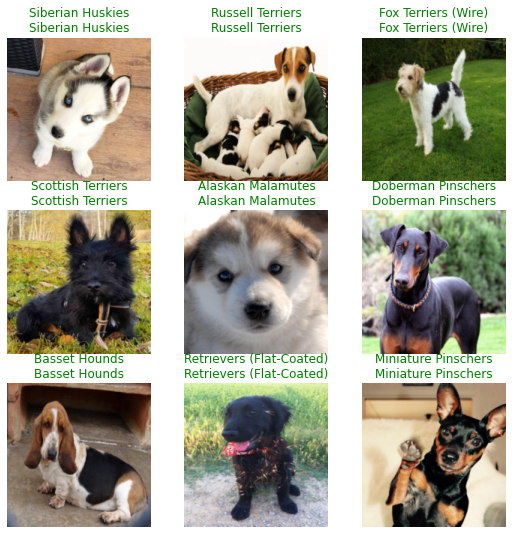

In [96]:
learn.show_results()

SuggestedLRs(valley=0.00015848931798245758)

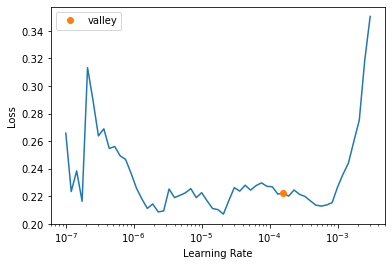

In [99]:
learn.lr_find()

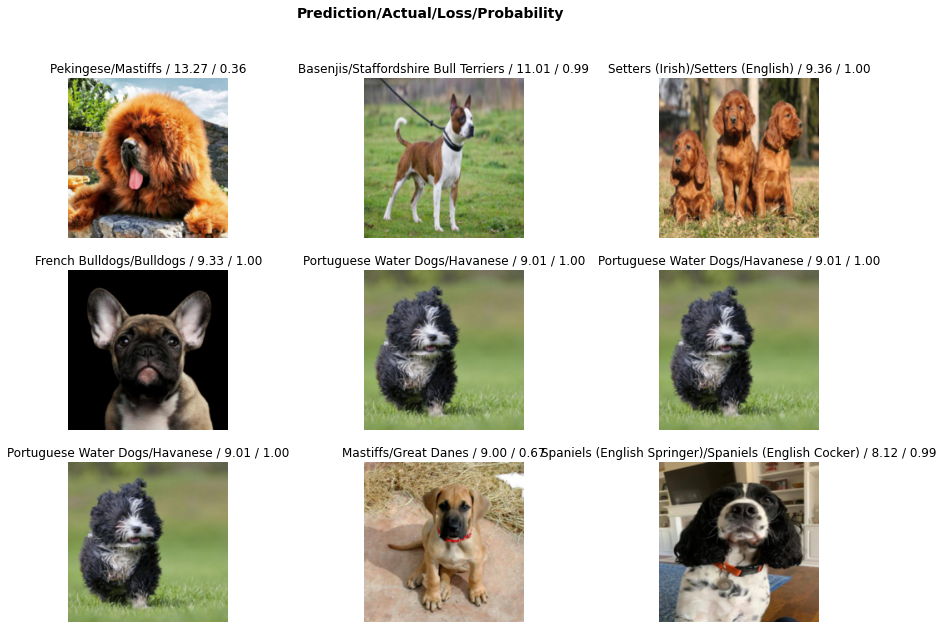

In [98]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [106]:
interp_class = ClassificationInterpretation.from_learner(learn)
interp_class.most_confused()

[('Spaniels (English Cocker)', 'Spaniels (Cocker)', 9),
 ('Italian Greyhounds', 'Whippets', 8),
 ('Standard Schnauzers', 'Miniature Schnauzers', 8),
 ('Collies', 'Border Collies', 7),
 ('Spaniels (Cocker)', 'Spaniels (English Cocker)', 7),
 ('Staffordshire Bull Terriers', 'American Staffordshire Terriers', 7),
 ('Border Collies', 'Collies', 6),
 ('Standard Schnauzers', 'Giant Schnauzers', 5),
 ('American Staffordshire Terriers', 'Staffordshire Bull Terriers', 4),
 ('Australian Shepherds', 'Miniature American Shepherds', 4),
 ('Bull Terriers', 'American Staffordshire Terriers', 4),
 ('Havanese', 'Portuguese Water Dogs', 4),
 ('Lhasa Apsos', 'Shih Tzu', 4),
 ('Miniature Schnauzers', 'Standard Schnauzers', 4),
 ('Bull Terriers', 'Dogo Argentinos', 3),
 ('Collies', 'Shetland Sheepdogs', 3),
 ('Mastiffs', 'Bullmastiffs', 3),
 ('Miniature American Shepherds', 'Australian Shepherds', 3),
 ('Pointers (German Wirehaired)', 'Wirehaired Pointing Griffons', 3),
 ('Retrievers (Golden) ', 'Retriever

In [105]:
import fastai.vision.widgets
cleaner = fastai.vision.widgets.ImageClassifierCleaner(learn)
cleaner